# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get Data

In [2]:
df = pd.read_csv("911.csv")

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Top 5 Zip codes for 911 Calls**

In [5]:
df["zip"].value_counts(ascending=False).head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 Townships codes for 911 Calls**

In [6]:
df["twp"].value_counts(ascending=False).head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Creating a new Feature - Reason

**`Title` column is made of Reason:Issue Category** <br>
**Eg - EMS: BACK PAINS/INJURY**<br>
**List of Reasons - EMS, Traffic,Fire**<br>
**Reasons can be extracted to make a new feature**<br>

In [7]:
df["Reason"] = df["title"].apply(lambda value : value.split(":")[0])

In [8]:
df["Reason"]

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

**Value Counts for each Reason**

In [9]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**CountPlot of 911 calls by Reason**

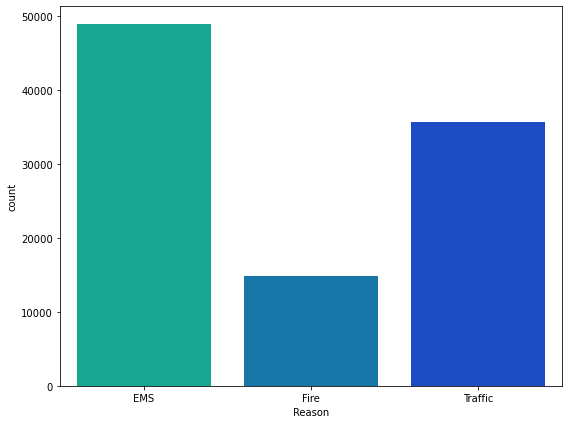

In [10]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, x="Reason" , palette="winter_r")

plt.tight_layout()

### Creating a new Feature - Reason

- `timeStamp` column is string. So convert it to TimeStamp Object
    - use pd.to_datetime() function

In [11]:
type( df["timeStamp"][0] )

str

In [12]:
df["timeStamp"] = pd.to_datetime( df["timeStamp"] )

In [13]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

- now extrat hour, month and day of week from the timeStamp column and create 3 new respective columns

In [14]:
df["Hour"] = df["timeStamp"].apply(lambda value : value.hour)

df["Hour"].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

In [15]:
df["Month"] = df["timeStamp"].apply(lambda value : value.month)

df["Month"].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [16]:
df["Weekday"] = df["timeStamp"].apply(lambda value : value.weekday())

df["Weekday"].head()

0    3
1    3
2    3
3    3
4    3
Name: Weekday, dtype: int64

**calls per Month in DESC order**

In [17]:
m_map = {
    1 : "Jan", 2 : "Feb" , 3 : "Mar" , 4 : "Apr" , 5 : "May" , 6 : "Jun" , 
    7 : "Jul" , 8 : "Aug" , 9 : "Sep" , 10 : "Oct" , 11 : "Nov" , 12 : "Dec"
}

In [18]:
df["Month"].map(lambda value : m_map[value]).value_counts(ascending=False)

Jan    13205
Jul    12137
Jun    11786
Feb    11467
May    11423
Apr    11326
Mar    11101
Aug     9078
Dec     7969
Name: Month, dtype: int64

Text(29.125, 0.5, 'Count')

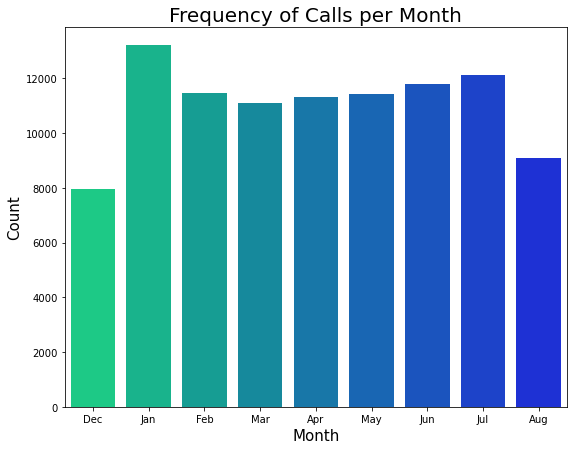

In [19]:
plt.figure(figsize=(8,6))

sns.countplot(x=df["Month"].map(lambda value : m_map[value]), palette="winter_r")

plt.tight_layout()

plt.title('Frequency of Calls per Month', fontdict={'fontsize':20})
plt.xlabel("Month" , fontdict={'fontsize':15})
plt.ylabel("Count" , fontdict={'fontsize':15})

**calls per WeekDay in DESC order**

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
df["Weekday"].map(lambda value : dmap[value]).value_counts(ascending=False)

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Weekday, dtype: int64

Text(29.125, 0.5, 'Count')

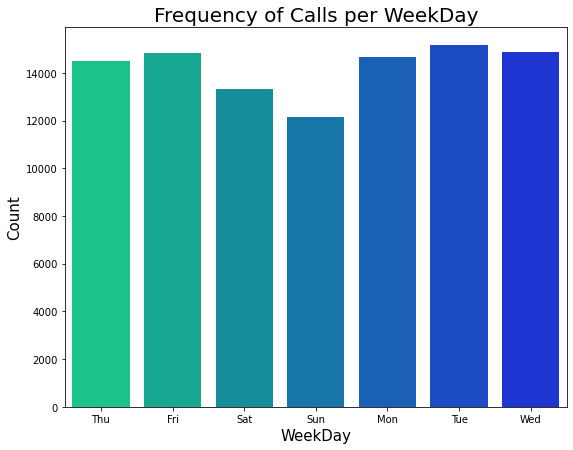

In [22]:
plt.figure(figsize=(8,6))

sns.countplot(data=df , x=df["Weekday"].map(lambda value : dmap[value]), palette="winter_r")

plt.tight_layout()
plt.title('Frequency of Calls per WeekDay', fontdict={'fontsize':20})
plt.xlabel("WeekDay" , fontdict={'fontsize':15})
plt.ylabel("Count" , fontdict={'fontsize':15})

**calls per Month in categorized by Reason**

Text(35.5, 0.5, 'Count')

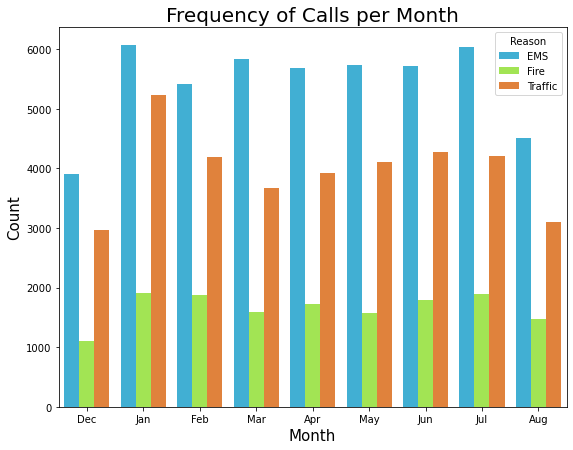

In [23]:
plt.figure(figsize=(8,6))

sns.countplot(x=df["Month"].map(lambda value : m_map[value]), palette="turbo", hue=df["Reason"])

plt.tight_layout()

plt.title('Frequency of Calls per Month', fontdict={'fontsize':20})
plt.xlabel("Month" , fontdict={'fontsize':15})
plt.ylabel("Count" , fontdict={'fontsize':15})

**Group By Month and Show Count using lmplot()**

In [24]:
byMonth = df.groupby("Month").count()

In [25]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Weekday
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [26]:
byMonth["Reason"].reset_index()

,Month,Reason
0,1,13205
1,2,11467
2,3,11101
3,4,11326
4,5,11423
5,6,11786
6,7,12137
7,8,9078
8,12,7969


<Figure size 720x648 with 0 Axes>

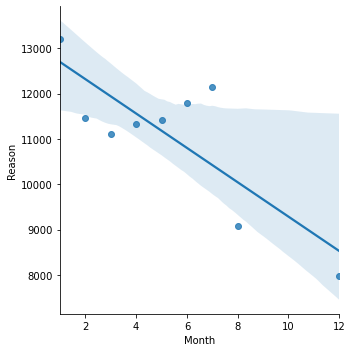

In [27]:
plt.figure(figsize=(10,9))

sns.lmplot(data =byMonth["Reason"].reset_index() , x="Month" , y="Reason")

plt.tight_layout()

**Create a Date Column** 

In [28]:
df["Date"] = df["timeStamp"].apply(lambda value : value.date())

In [29]:
# Only date no time
df["Date"]

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

- Group by Date

In [30]:
byDate = df.groupby(by="Date").count()

In [31]:
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Weekday
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


- draw lineplot to show count of calls by date

Text(0.5, 1.0, 'Frequency of Calls by Date')

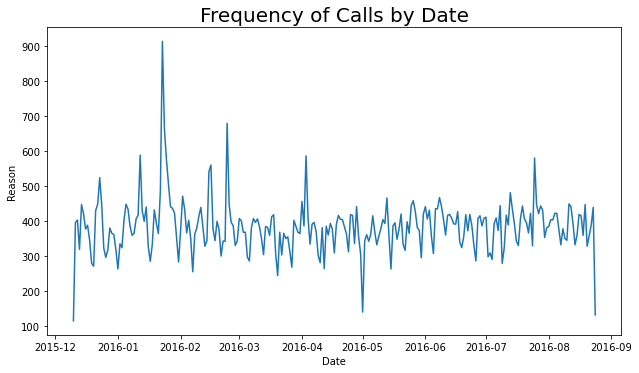

In [32]:
plt.figure(figsize=(9,5))

sns.lineplot(data=byDate["Reason"].reset_index() , x="Date" , y="Reason")

plt.tight_layout()

plt.title('Frequency of Calls by Date', fontdict={'fontsize':20})

- LinePlots for Frequency of calls for Dates - categorized by Reason

In [33]:
byDate_EMS = df[ df["Reason"] == "EMS" ].groupby("Date")

Text(50.875, 0.5, 'count')

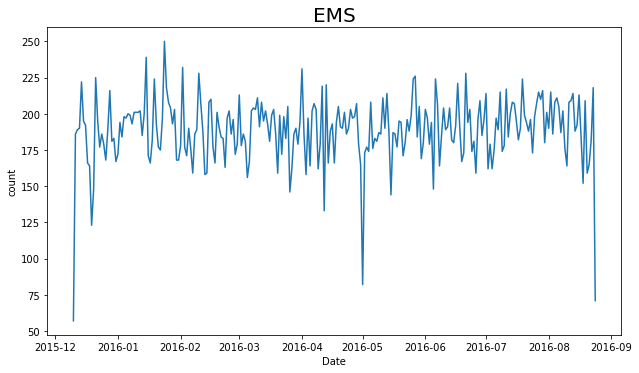

In [34]:
plt.figure(figsize=(9,5))

sns.lineplot(data=byDate_EMS.count()["Reason"])

plt.tight_layout()

plt.title('EMS', fontdict={'fontsize':20})
plt.ylabel("count")

Text(50.875, 0.5, 'count')

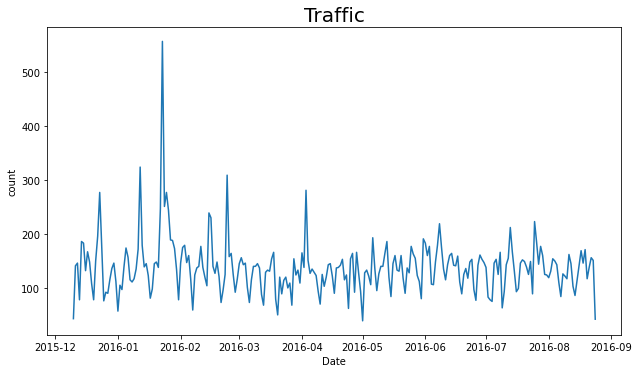

In [35]:
byDate_Traffic = df[ df["Reason"] == "Traffic" ].groupby("Date")

plt.figure(figsize=(9,5))

sns.lineplot(data=byDate_Traffic.count()["Reason"])

plt.tight_layout()
plt.title('Traffic', fontdict={'fontsize':20})
plt.ylabel("count")

Text(50.875, 0.5, 'count')

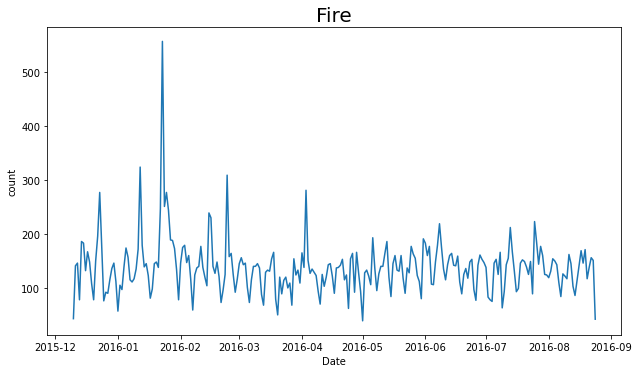

In [36]:
byDate_Fire = df[ df["Reason"] == "Fire" ].groupby("Date")

plt.figure(figsize=(9,5))

sns.lineplot(data=byDate_Traffic.count()["Reason"])

plt.tight_layout()
plt.title('Fire', fontdict={'fontsize':20})
plt.ylabel("count")

**HeatMap to show relation b/w day of week and hour of day - for num of calls**

- map weekday with actual names of the days
- map month names with actul names of the months

In [37]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [38]:
df["Weekday"] = df["Weekday"].map(lambda value : dmap[value])

In [39]:
m_map

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [40]:
df["Month"] = df["Month"].map(lambda value : m_map[value])

In [41]:
dayHour = df.groupby(["Weekday" , "Hour"]).count()["Reason"].unstack()

In [42]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

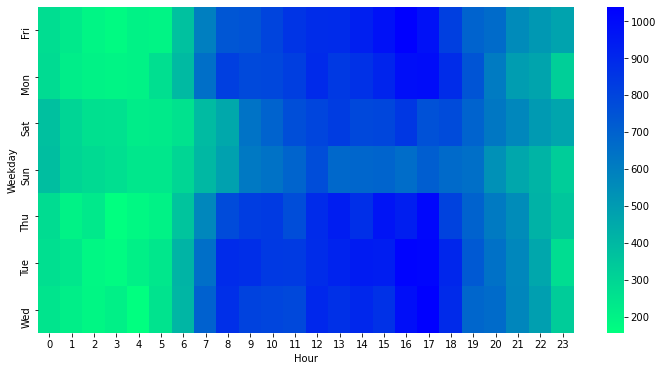

In [43]:
plt.figure(figsize=(12,6))

sns.heatmap(data=dayHour, cmap="winter_r")

<Figure size 864x432 with 0 Axes>

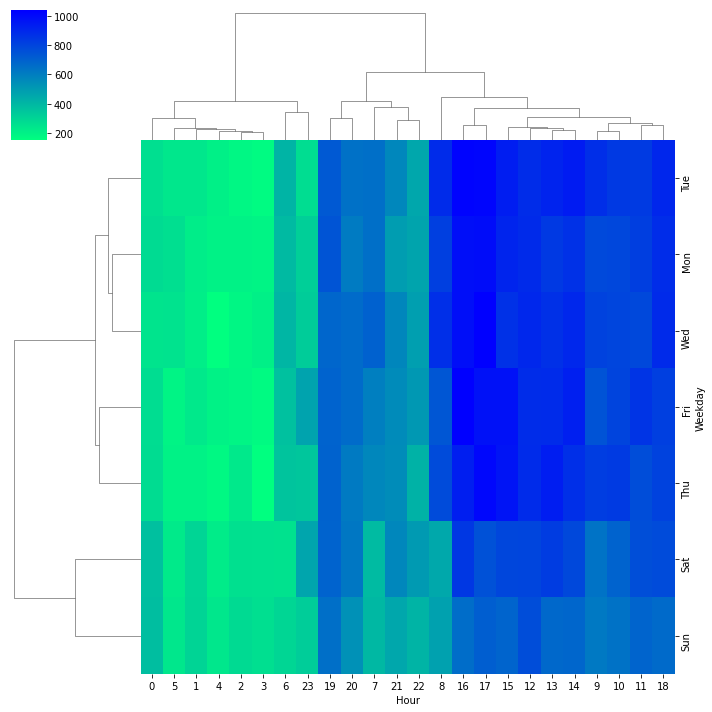

In [44]:
plt.figure(figsize=(12,6))

sns.clustermap(data=dayHour, cmap="winter_r")

**HeatMap to show relation b/w day of week-day and month - for num of calls**

In [45]:
weekdayMonth = df.groupby(["Weekday", "Month"]).count()["Reason"].unstack()

In [46]:
weekdayMonth

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May
Weekday,,,,,,,,,
Fri,1958,1310,1065,1581,1970,2045,1649,1525,1730
Mon,1598,1511,1257,1964,1727,1692,1617,1535,1779
Sat,1734,1099,978,1441,2291,1695,1388,1266,1444
Sun,1488,1021,907,1229,1960,1672,1333,1102,1424
Thu,1601,1230,1266,1596,1584,1646,2065,1900,1590
Tue,1430,1612,1234,1753,1973,1670,1676,1884,1918
Wed,1517,1295,1262,1903,1700,1717,2058,1889,1538


<AxesSubplot:xlabel='Month', ylabel='Weekday'>

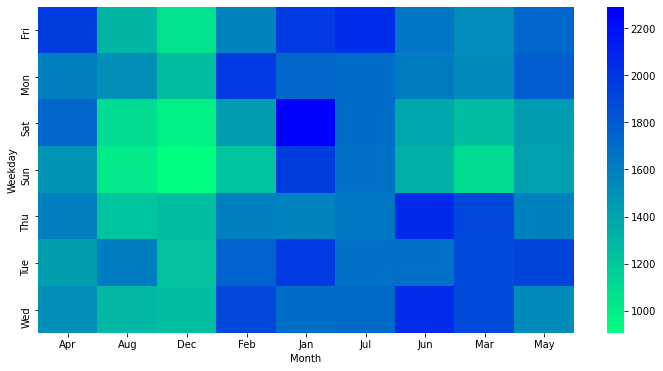

In [47]:
plt.figure(figsize=(12,6))

sns.heatmap(data=weekdayMonth, cmap="winter_r")

<Figure size 864x432 with 0 Axes>

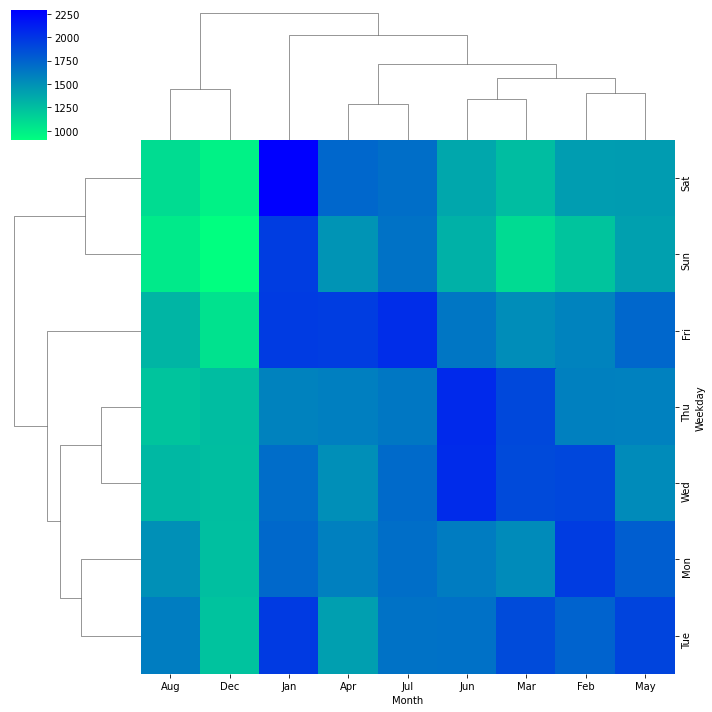

In [48]:
plt.figure(figsize=(12,6))

sns.clustermap(data=weekdayMonth, cmap="winter_r")